# Narrowing down EDA
We want to combine individual EDA into what supports our problem statement and will support our upcoming modelling

### Key factors that the EDA should answer 
- How common are delays 
- Patterns or cerrelations in delay frequency or severity 
- Provide hypothesis for modelling (which features are most relevant)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Arbitrary theme so that our plots look consistent (change if you want)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("FLIGHTS.csv")
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",700,707.0,7.0,0.0,0.0,950.0,15.0,1.0,1.0,0.0,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",1830,1826.0,0.0,0.0,-1.0,2112.0,2.0,0.0,0.0,0.0,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,1080003,"Burbank, CA",1420,1426.0,6.0,0.0,0.0,1516.0,0.0,0.0,-1.0,0.0,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,1082106,"Baltimore, MD",1500,1514.0,14.0,0.0,0.0,2050.0,15.0,1.0,1.0,0.0,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,1125904,"Dallas, TX",530,527.0,0.0,0.0,-1.0,805.0,0.0,0.0,-1.0,0.0,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
df_completed = df[df['CANCELLED'] == 0] # Use non cancelled flights + base off of departure delay not arrival delay
df_completed.shape

(7444080, 32)

# Delay Overview 

## Have 
- Summary of delays, distance and time of flights
- Average minutes delayed for each month / for each day of the week 

## Should include
- % of flights delyaed by month / for each day of the week
- Flights delayed on holidays 

In [11]:
df_completed[['DEP_TIME','DEP_DEL15', 'ARR_DELAY_NEW', 'DEP_DELAY_NEW','ARR_TIME', 'ARR_DEL15', 'ACTUAL_ELAPSED_TIME','DISTANCE']].describe().round(4)

,DEP_TIME,DEP_DEL15,ARR_DELAY_NEW,DEP_DELAY_NEW,ARR_TIME,ARR_DEL15,ACTUAL_ELAPSED_TIME,DISTANCE
count,7.444080e+06,7.444080e+06,7.444080e+06,7.444080e+06,7.442461e+06,7.444080e+06,7.444080e+06,7.444080e+06
mean,1.330657e+03,2.033000e-01,1.591770e+01,1.586380e+01,1.462144e+03,2.066000e-01,1.384101e+02,8.066165e+02
std,5.066335e+02,4.025000e-01,5.513970e+01,5.521490e+01,5.418492e+02,4.049000e-01,7.171910e+01,5.910357e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+01,1.100000e+01
25%,9.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.047000e+03,0.000000e+00,8.600000e+01,3.730000e+02
50%,1.325000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.503000e+03,0.000000e+00,1.210000e+02,6.490000e+02
75%,1.744000e+03,0.000000e+00,9.000000e+00,9.000000e+00,1.917000e+03,0.000000e+00,1.690000e+02,1.045000e+03
max,2.400000e+03,1.000000e+00,3.803000e+03,3.777000e+03,2.400000e+03,1.000000e+00,2.174000e+03,5.095000e+03


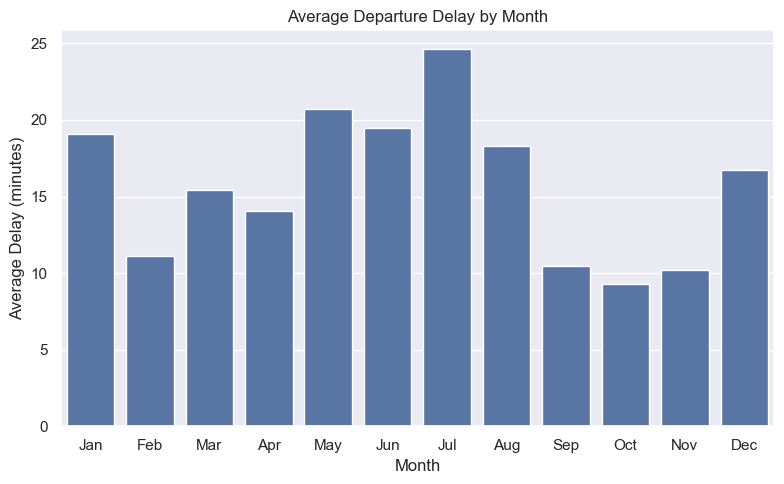

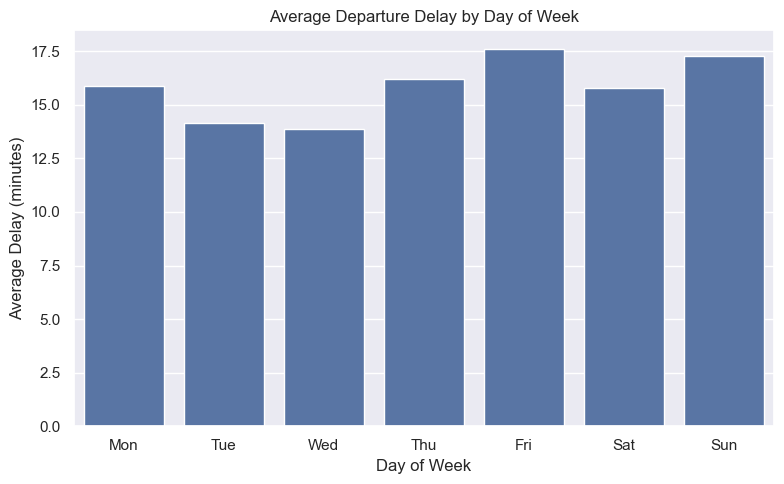

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_completed, x="MONTH", y="DEP_DELAY_NEW", estimator="mean", errorbar=None)
plt.title("Average Departure Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(0, 12), 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df_completed, x="DAY_OF_WEEK", y="DEP_DELAY_NEW", estimator="mean", errorbar=None)
plt.title("Average Departure Delay by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(0,7), ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.tight_layout()
plt.show()

# Airline and Airport Patterns 
(Chloe)
- Might want to do a bit more analysis into how we can glassify airlines or airports by size (i.e. what constitutes a "small" airline vs. a large). That would be helpful when we then do clustering later on.
- Might be able to do some sepration based on the airport name (international / regional / municipal)

# Delay Reason Analysis 
(Elena)


# Weather Relationships
(Grace)